In [3]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "automobile-dataset" "car-insurance-data"

# 2 Hands On: Data Quality and Pre-Processing

## 1. Assessing Data Quality

**Load the following packages: dplyr, na.tools, tidyimpute (version from github
decisionpatterns/tidyimpute”)**

**Load the carInsurance data set about the insurance risk rating of cars based on several characteristics of
each car1**


In [28]:
cardf <- read.csv("/kaggle/input/ucmachinelearning/imports-85.data")
head(cardf)

,X3,X.,alfa.romero,gas,std,two,convertible,rwd,front,X88.60,⋯,X130,mpfi,X3.47,X2.68,X9.00,X111,X5000,X21,X27,X13495
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


In [31]:
colnames(cardf) <- c("symboling", "normalized-losses", "make", "fuel-type", "aspiration", "nDoors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price")

head(cardf)

[1] "symboling"         "normalized-losses" "make"             
 [4] "fuel-type"         "aspiration"        "nDoors"           
 [7] "body-style"        "drive-wheels"      "engine-location"  
[10] "wheel-base"        "length"            "width"            
[13] "height"            "curb-weight"       "engine-type"      
[16] "num-of-cylinders"  "engine-size"       "fuel-system"      
[19] "bore"              "stroke"            "compression-ratio"
[22] "horsepower"        "peak-rpm"          "city-mpg"         
[25] "highway-mpg"       "price"

,symboling,normalized-losses,make,fuel-type,aspiration,nDoors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


**(a) Check if there are any missing values.**

In [34]:
vall_null <- sum(is.na(cardf) | cardf == "?")

print(paste("Casos con valores nulos: ", vall_null))

[1] "Casos con valores nulos:  58"


**(b) Count the number of cases that have, at least, one missing value.**

In [35]:
vall_null2 <- colSums(is.na(cardf) | cardf == "?")

vall_null2[vall_null2 >= 0]

symboling normalized-losses              make         fuel-type 
                0                40                 0                 0 
       aspiration            nDoors        body-style      drive-wheels 
                0                 2                 0                 0 
  engine-location        wheel-base            length             width 
                0                 0                 0                 0 
           height       curb-weight       engine-type  num-of-cylinders 
                0                 0                 0                 0 
      engine-size       fuel-system              bore            stroke 
                0                 0                 4                 4 
compression-ratio        horsepower          peak-rpm          city-mpg 
                0                 2                 2                 0 
      highway-mpg             price 
                0                 4

**(c) Create a new data set by removing all the cases that have missing values**

In [36]:
cardf[cardf == "?"] <- NA
cardf_clean <- cardf[complete.cases(cardf), ]

head(cardf_clean)
val_null <- sum(is.na(cardf_clean))
print(paste("Valores nulos: ", val_null))

,symboling,normalized-losses,make,fuel-type,aspiration,nDoors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


[1] "Valores nulos:  0"


**(d) Create a new data set by imputing all the missing values with 0.**

In [37]:
cardf_miss <- replace(cardf, is.na(cardf), 0)

head(cardf_miss)
val_null2 <- sum(is.na(cardf_miss))
print(paste("Valores nulos: ", val_null2))

,symboling,normalized-losses,make,fuel-type,aspiration,nDoors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,0,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


[1] "Valores nulos:  0"


**(e) Create a new data set by imputing the mean in all the columns which have double type values**

In [43]:
library(zoo)

new_cardf <- cardf
nuw_col <- sapply(new_cardf, is.numeric)
new_cardf[, nuw_col] <- na.aggregate(new_cardf[, nuw_col], FUN = mean)

head(new_cardf)

,symboling,normalized-losses,make,fuel-type,aspiration,nDoors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


**(f) Create a new data set by imputing the mode in all the columns which have integer type values**

In [42]:
#Buscar el mode con una funcion
mode <- function(x) {
  unico <- unique(x)
  unico[which.max(tabulate(match(x, unico)))]
}
#Columnas con valores tipo integer
col_int <- sapply(cardf, is.integer)

cardf_imp <- cardf

for (columna in names(cardf_imp)[col_int]) {
  val_null3 <- is.na(cardf_imp[[columna]])
  modo <- mode(cardf_imp[[columna]])
  cardf_imp[[columna]][val_null3] <- modo
}

head(cardf_imp)

,symboling,normalized-losses,make,fuel-type,aspiration,nDoors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


**(g) Create a new data set by imputing the most frequent value to the column ”nDoors”**

In [47]:
mode <- function(x) {
  unico <- unique(x)
  unico[which.max(tabulate(match(x, unico)))]
}

nDoors_mode <- mode(cardf$nDoors)

cardf_imp2 <- cardf
cardf_imp2$nDoors[is.na(cardf_imp2$nDoors)] <- nDoors_mode

head(cardf_imp2)

,symboling,normalized-losses,make,fuel-type,aspiration,nDoors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


**(h) Combine the three last imputations to obtain a final dataset. Are there any duplicated cases?**


# 2. Data Pre-Processing

## 2. Load the package dlookr. Use the same car insurance data set above and apply the following transformations to the price attribute. Be critical regarding the obtained results.

**(a) Apply range-based normalization and z-score normalization.**

In [57]:
cardf$price <- as.numeric(cardf$price)
range_normalized <- transform(cardf, range_normalized = (price - min(price, na.rm = TRUE)) / (max(price, na.rm = TRUE) - min(price, na.rm = TRUE)))

zscore_normalized <- transform(cardf, zscore_normalized = scale(price))

head(range_normalized)
head(zscore_normalized)

,symboling,normalized.losses,make,fuel.type,aspiration,nDoors,body.style,drive.wheels,engine.location,wheel.base,⋯,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price,range_normalized
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,0.2825580
2,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,0.2825580
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,0.2192543
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,0.3061417
5,2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,0.2515267
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,mpfi,3.19,3.40,8.5,110,5500,19,25,17710,0.3125962


,symboling,normalized.losses,make,fuel.type,aspiration,nDoors,body.style,drive.wheels,engine.location,wheel.base,⋯,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price,zscore_normalized
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,0.41349532
2,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,0.41349532
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,0.09342433
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,0.53273745
5,2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,0.25659778
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,mpfi,3.19,3.40,8.5,110,5500,19,25,17710,0.56537214


**(b) Discretize it into 4 equal-frequency ranges an into 4 equal-width ranges.**


In [58]:
equal_freq_ranges <- cut(cardf$price, breaks = 4, labels = FALSE, include.lowest = TRUE)

equal_width_ranges <- cut(cardf$price, breaks = 4, labels = FALSE, include.lowest = TRUE, dig.lab = 4)

head(equal_freq_ranges)
head(equal_width_ranges)

[1] 2 2 1 2 2 2

[1] 2 2 1 2 2 2

## 3. With the seed 111019 obtain the following samples on the car insurance data set.

In [61]:
set.seed(111019)

sample1 <- cardf[sample(nrow(cardf), min(100, nrow(cardf)), replace = FALSE), ]

sample2 <- cardf[sample(nrow(cardf), min(200, nrow(cardf)), replace = FALSE), ]

sample3 <- cardf[sample(nrow(cardf), min(300, nrow(cardf)), replace = FALSE), ]

head(sample1)
head(sample2)
head(sample3)

,symboling,normalized-losses,make,fuel-type,aspiration,nDoors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>
91,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,⋯,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649
34,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,⋯,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129
116,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,⋯,152,idi,3.70,3.52,21.0,95,4150,28,33,17950
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
145,0,102,subaru,gas,turbo,four,sedan,4wd,front,97.0,⋯,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,⋯,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980


,symboling,normalized-losses,make,fuel-type,aspiration,nDoors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>
126,3,NA,porsche,gas,std,two,hardtop,rwd,rear,89.5,⋯,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528
91,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,⋯,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649
193,0,NA,volkswagen,gas,std,four,wagon,fwd,front,100.4,⋯,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
101,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,⋯,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
82,3,NA,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,⋯,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,⋯,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845


,symboling,normalized-losses,make,fuel-type,aspiration,nDoors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>
35,0,110,honda,gas,std,four,sedan,fwd,front,96.5,⋯,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7295
42,1,107,honda,gas,std,two,sedan,fwd,front,96.5,⋯,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
133,2,104,saab,gas,std,four,sedan,fwd,front,99.1,⋯,121,mpfi,3.54,3.07,9.3,110,5250,21,28,12170
106,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,⋯,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
39,0,85,honda,gas,std,four,sedan,fwd,front,96.5,⋯,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845


**(a) A random sample of 60% of the cases, with replacement**

In [62]:
set.seed(111019)

sample_size <- round(0.6 * nrow(cardf))

sample_with_replacement <- cardf[sample(nrow(cardf), sample_size, replace = TRUE), ]
head(sample_with_replacement)

,symboling,normalized-losses,make,fuel-type,aspiration,nDoors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>
91,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,⋯,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649
34,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,⋯,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129
116,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,⋯,152,idi,3.70,3.52,21.0,95,4150,28,33,17950
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
145,0,102,subaru,gas,turbo,four,sedan,4wd,front,97.0,⋯,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,⋯,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980


**(b) A stratified sample of 60% of the cases of cars, according to the fuelType attribute**

In [67]:
set.seed(111019)

stratified_sample <- cardf[ave(seq(nrow(cardf)), cardf$"fuel-type", FUN = function(x) sample(x, size = round(0.6 * length(x)))), ]

head(stratified_sample)

Warning message in x[i] <- value[[j]]:
“number of items to replace is not a multiple of replacement length”
Warning message in x[i] <- value[[j]]:
“number of items to replace is not a multiple of replacement length”


,symboling,normalized-losses,make,fuel-type,aspiration,nDoors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>
142,0,102,subaru,gas,std,four,sedan,fwd,front,97.2,⋯,108,2bbl,3.62,2.64,9.5,82,4400,28,33,7775
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,⋯,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
145,0,102,subaru,gas,turbo,four,sedan,4wd,front,97.0,⋯,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259
44,1,NA,isuzu,gas,std,two,sedan,fwd,front,94.5,⋯,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NA
131,2,NA,renault,gas,std,two,hatchback,fwd,front,96.1,⋯,132,mpfi,3.46,3.90,8.7,NA,NA,23,31,9895
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


**(c) Use the table() function to inspect the distribution of values in each of the two samples above.**

In [68]:
table_random <- table(sample_with_replacement$"fuel-type")
print(table_random)

table_stratified <- table(stratified_sample$"fuel-type")
print(table_stratified)


diesel    gas 
    20    102 

diesel    gas 
    20    184 


## 4. Load the package corrplot and select the numeric attributes of the car insurance data set.

In [70]:
num_attri <- cardf[sapply(cardf, is.numeric)]

head(num_attri)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450
5,2,99.8,177.3,66.3,53.1,2507,136,8.5,19,25,15250
6,1,105.8,192.7,71.4,55.7,2844,136,8.5,19,25,17710


**(a) Using the function cor(), obtain the pearson correlation coefficient between each pair of variables.**

In [71]:
correl_matrix <- cor(num_attri, use = "pairwise.complete.obs")

print(correl_matrix)

                    symboling wheel-base     length      width      height
symboling          1.00000000 -0.5250949 -0.3567924 -0.2277985 -0.53307768
wheel-base        -0.52509490  1.0000000  0.8776119  0.7951150  0.58260311
length            -0.35679238  0.8776119  1.0000000  0.8411992  0.49196947
width             -0.22779853  0.7951150  0.8411992  1.0000000  0.27407459
height            -0.53307768  0.5826031  0.4919695  0.2740746  1.00000000
curb-weight       -0.22928082  0.7817629  0.8780901  0.8684931  0.29842851
engine-size       -0.10722931  0.5739894  0.6838298  0.7370420  0.06857659
compression-ratio -0.17741335  0.2491986  0.1579134  0.1802869  0.26103597
city-mpg          -0.03055651 -0.4796330 -0.6732506 -0.6471770 -0.05565927
highway-mpg        0.03959770 -0.5528967 -0.7066348 -0.6811688 -0.11399459
price             -0.08332691  0.5891470  0.6910441  0.7527949  0.13728353
                  curb-weight engine-size compression-ratio    city-mpg
symboling          -0.229280

**(b) Apply the function cor.mtest() to the previous result to calculate the p-values and confidence intervals of the correlation coefficient for each pair of variables.**

In [76]:
correl_matrix <- cor(correl_matrix, use = "pairwise.complete.obs")

correlation_tests <- cor.mtest(correl_matrix, conf.level = 0.95)

print(correlation_tests)

$p
                     symboling   wheel-base       length        width
symboling         0.000000e+00 1.099032e-03 3.994890e-03 8.129661e-03
wheel-base        1.099032e-03 0.000000e+00 1.974063e-10 1.744988e-08
length            3.994890e-03 1.974063e-10 0.000000e+00 5.617379e-12
width             8.129661e-03 1.744988e-08 5.617379e-12 0.000000e+00
height            2.228218e-09 3.939847e-04 1.675464e-03 3.865183e-03
curb-weight       9.740908e-03 4.253178e-08 3.881453e-11 6.217673e-17
engine-size       2.220850e-02 1.443446e-06 2.568211e-08 3.641186e-10
compression-ratio 7.044815e-01 2.536405e-01 1.572829e-01 1.174978e-01
city-mpg          3.127853e-02 4.746766e-06 1.511906e-07 7.540723e-09
highway-mpg       2.413675e-02 1.879033e-06 3.648583e-08 9.776722e-10
price             2.048369e-02 1.043775e-06 1.503163e-08 1.506180e-10
                        height  curb-weight  engine-size compression-ratio
symboling         2.228218e-09 9.740908e-03 2.220850e-02        0.70448153
wheel-b

**(c) Plot the all correlation information using the function corrplot. Explore some of its parameters**

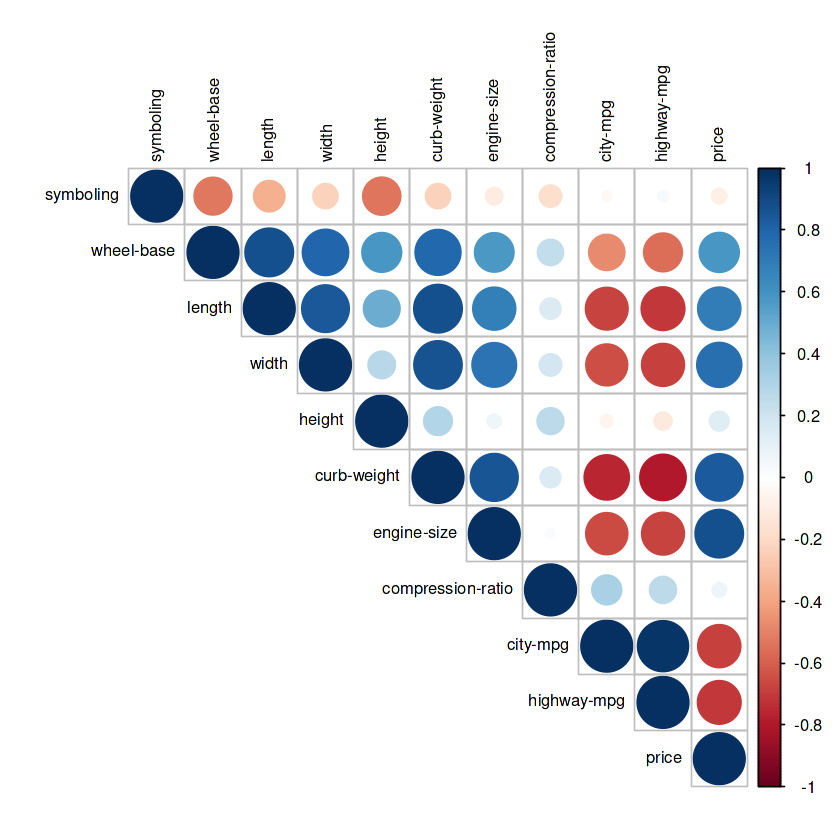

In [78]:
correlation_matrix <- cor(num_attri, use = "pairwise.complete.obs")

corrplot(correlation_matrix, method = "circle", type = "upper", tl.cex = 0.8, tl.col = "black")

## 5. Load the data set USJudgeRatings, from the datasets package, containing lawyers’ ratings of state judges in the US Superior Court regarding a set of attributes.

In [88]:
judgedf <- read.csv("/kaggle/input/data2dd/dataset-29460 (1).csv")

head(judgedf)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN,X,X.1
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AARONSON,"L.H.""",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
2,ALEXANDER,"J.M.""",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
3,ARMENTANO,"A.J.""",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
4,BERDON,"R.I.""",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
5,BRACKEN,"J.J.""",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
6,BURNS,"E.B.""",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6


**(a) Apply the function prcomp() to obtain the principal components. Inspect how each variable is obtained by the linear combination of each component.**

In [96]:
library(dplyr)
numeric_judgedf <- select_if(judgedf, is.numeric)
numeric_judgedf <- na.omit(numeric_judgedf)
pca <- prcomp(numeric_judgedf)
variable_loadings <- pca$rotation
print(variable_loadings)

              PC1          PC2         PC3          PC4         PC5         PC6
DMNR 0.0005176347 -0.925319938  0.26829625 -0.244456989 -0.08364640 -0.01759791
DILG 0.2384700725  0.150917569  0.19846123 -0.350403053 -0.04884922 -0.55580977
CFMG 0.3503302562  0.245638729  0.61175614 -0.311903082  0.22258344  0.38967082
DECI 0.2878557723 -0.048249676 -0.30721768 -0.151295333  0.41572824 -0.50072891
PREP 0.2696668082 -0.168335478 -0.16851056  0.084223055  0.46517205  0.15708454
FAMI 0.2503168911 -0.123187617 -0.27050422  0.128571244  0.36016318  0.36009143
ORAL 0.3093315740 -0.048423310 -0.25948843 -0.087498531 -0.13445402 -0.01760279
WRIT 0.3038882668 -0.018078304 -0.28010707 -0.060873921 -0.47963114  0.07229519
PHYS 0.3318264167 -0.009131913 -0.03185807  0.007976998 -0.26102322  0.13725736
RTEN 0.3132241675  0.017179694 -0.15604749 -0.088354430 -0.31696867  0.19290736
X    0.2749408094 -0.100909008  0.31928490  0.804383111 -0.06884455 -0.22553296
X.1  0.3609931983  0.039945676  0.212910

**(b) Load the package ggbiplot and plot the two first components with the function ggbiplot(). You can label each point with the lawyer’s name by setting the labels parameter.**

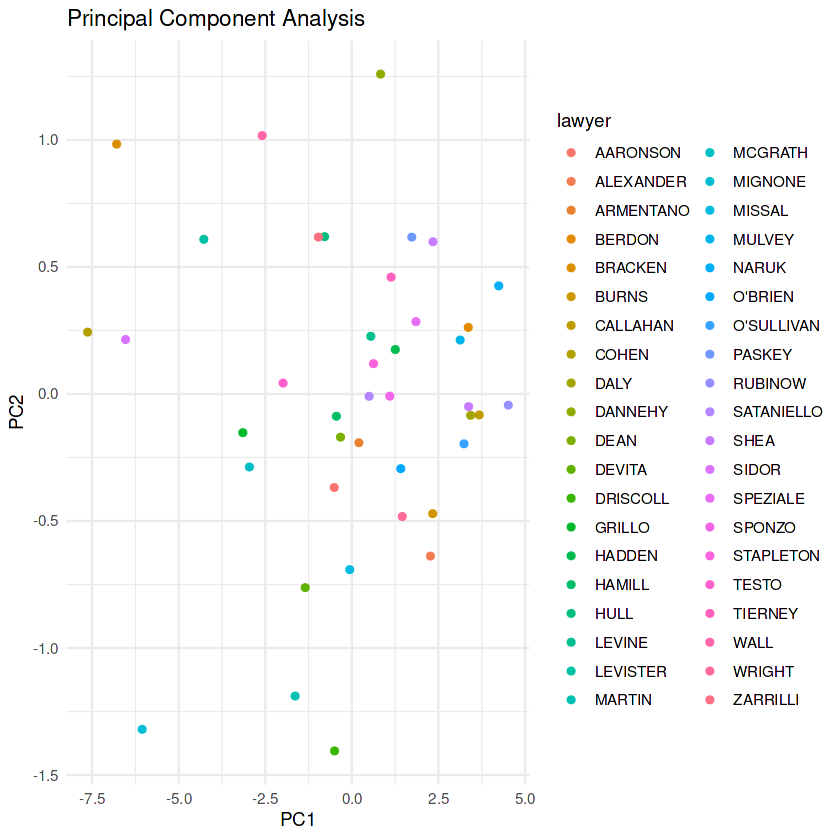

In [103]:
numeric_judgedf <- judgedf[, sapply(judgedf, is.numeric)]

pca <- prcomp(numeric_judgedf[, -1])

scores <- as.data.frame(pca$x[, 1:2])

scores$lawyer <- judgedf$CONT

library(ggplot2)

ggplot(scores, aes(PC1, PC2, color = lawyer)) +
  geom_point() +
  labs(title = "Principal Component Analysis") +
  theme_minimal()